In [2]:
import numpy as np
from sympy.physics.wigner import wigner_3j,wigner_6j
import sympy as sy
from numpy import linalg as LA
from IPython.display import Latex
import matplotlib.pyplot as plt
%matplotlib inline

#The following three lines are only for asthetics and can be commented out if desired
import seaborn as sns
sns.set()
sns.set_palette('terrain')

from Energy_Levels import MoleculeLevels
np.set_printoptions(precision=5, suppress=True)

This notebook computes the energy levels for YbOH isotopologues in E and B fields

First, we construct the Hamiltonian as a class carrying a symbolic function. Using this function, the Hamiltonian can be evaluated at different values of E and B. The symbolic function is assembled once, reducing the burden for large matrices.

The class initialization arguments are: isotope, state, N_range, M_values, I, S, round

isotope = string denoting Yb isotope (ie '174')\
state = string denoting vibronic state (ie 'X010')\
N_range = tuple denoting (Nmin,Nmax)\
M_values = options are 'all', 'pos', 'none'. Default is 'all'. For accurate zero-field splittings, use 'none'.\
I = Array of nuclear spins, $[I_{Yb}, I_H]$. Default is $[0,1/2]$.\
S = Electronic spin. Default is 1/2.\
round = how many digits after decimal to round results 

In [3]:
N_list = [i for i in range(0,1,1)]
print(N_list)

[0]


In [14]:
X010_174= MoleculeLevels.initialize_state('YbOH','174','X010',N_range=[1],M_values = 'all',I=[0,1/2],P_values=[1/2,3/2],S=1/2,round=6)

The above object is an instance of the YbOHLevels class. It contains the Hamiltonian for the $\tilde{X}^2 \Sigma (010)$ state of $^{174}$YbOH, for $N=1$ only, in the $b_{\beta J}$ basis.

In [15]:
for key in X010_174.__dict__.keys(): print(key)

molecule
iso_state
isotope
state
N_range
M_values
round
e_spin
I_spins
M_range
P_values
trap
theta_num
library
parameters
matrix_elements
hunds_case
K
q_numbers
q_str
alt_q_numbers
H_function
H_symbolic
I_trap
theta_trap
evals0
evecs0
E0
B0
size
Parity_mat
parities
Ez
_Bz
evals_E
evecs_E
Bz
_Ez
evals_B
evecs_B
H_PTV
PTV_E
PTV_B
PTV0
PTV_type
state_str


In [16]:
X010_174.q_numbers

{'K': [-1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1,
  -1,
  1],
 'N': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'J': [0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5,
  1.5],
 'F': [0.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0,
  2.0],
 'M': [0.0,
  0.0,
  -1.0,
  -1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  -2.0,
  -2.0,
  -1.0,
  -1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  2.0,
  2.0]}

These are the attributes of the YbOHLevels class. They contain information about the state, constants, matrix elements as functions, as well as other information the instance was initialized with.

Library is a class that contains all YbOH information and matrix elements, not just those for this particular state. This is useful for basis conversions, etc.

q_numbers is a dictionary containing the good quantum numbers of each basis vector. In this case, the basis vector is $|\Lambda;N,S,J,I,F,M\rangle$. Each dict item in q_numbers corresponds to one of the operators characterizing the basis and all its possible quantum numbers (ie eigenvalues). The ith basis vector is characterized by the ith index of each entry in q_numbers.
q_str is just the keys of q_numbers in a list.

In [17]:
i=0
print('Basis vector',i)
for q, q_value in X010_174.q_numbers.items():
    print(q,'=',q_value[i])

Basis vector 0
K = -1
N = 1.0
J = 0.5
F = 0.0
M = 0.0


The Hamiltonian is stored in two forms: as a function, and as a symbolic object. The function form takes as an argument the values of two fields: an electric field $E_z$ and magnetic field $B_z$. It returns a numpy matrix of the Hamiltonian at those field values. This is the form you want to diagonalize. \
The symbolic form is a sympy object. It is not useful for diagonalization, but can be useful for visualizing the Hamiltonian.\
H_builder is the function used to construct the Hamiltonian.

In [18]:
print(X010_174.H_function(0,0)[:4,:4])

[[7365.87233   17.68       0.         0.     ]
 [  17.68    7365.87233    0.         0.     ]
 [   0.         0.      7363.75456   17.68   ]
 [   0.         0.        17.68    7363.75456]]


In [19]:
sy.N(X010_174.H_symbolic[:4,:4],2)

Matrix([
[7.4e+3,   18.0,                            0,                            0],
[  18.0, 7.4e+3,                            0,                            0],
[     0,      0, 0.48*B_z - 0.36*E_z + 7.4e+3,                         18.0],
[     0,      0,                         18.0, 0.48*B_z + 0.36*E_z + 7.4e+3]])

evals0 and evecs0 contain the eigenvalues and eigenvectors associated with the most recent diagonalization.
To diagonalize the matrix at a particular value of $E$ and $B$, use the eigensystem method. $E$ is the first argument, $B$ is the second.

The resulting eigenvectors and eigenvalues are written to the attributes evecs0 and evals0.

The order keyword arg will order the output eigenvalues from low to high, default is True. The method keyword arg controls the backend used for diagonalization, default is numpy LA.eig().

Note: If you have M_values not 'none', you will need a small B field (1e-8 or so) to remove the M degeneracy in the diagonalization. 

In [20]:
evals, evecs = X010_174.eigensystem(0,1e-8,order=True,method='numpy')

Once the instance has eigenvalues and eigenvectors, you can use the write_state() method to visualize a given element in the eigenbasis. 

Note: write_state() looks at the current values of evecs0 and evals0

In [21]:
for i in range(4):
    X010_174.write_state(i)

E = 7299.755152 MHz

 -0.027296 |K=-1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 0.027296 |K=1,N=1.0,J=0.5,F=1.0,M=-1.0> 

 0.70658 |K=-1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 -0.70658 |K=1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 -2e-06 |K=-1,N=1.0,J=1.5,F=1.0,M=0.0> 

 2e-06 |K=1,N=1.0,J=1.5,F=1.0,M=0.0> 

E = 7299.755152 MHz

 -0.027296 |K=-1,N=1.0,J=0.5,F=1.0,M=0.0> 

 0.027296 |K=1,N=1.0,J=0.5,F=1.0,M=0.0> 

 2e-06 |K=-1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 -2e-06 |K=1,N=1.0,J=1.5,F=1.0,M=-1.0> 

 0.70658 |K=-1,N=1.0,J=1.5,F=1.0,M=0.0> 

 -0.70658 |K=1,N=1.0,J=1.5,F=1.0,M=0.0> 

E = 7299.755152 MHz

 -0.027296 |K=-1,N=1.0,J=0.5,F=1.0,M=1.0> 

 0.027296 |K=1,N=1.0,J=0.5,F=1.0,M=1.0> 

 0.70658 |K=-1,N=1.0,J=1.5,F=1.0,M=1.0> 

 -0.70658 |K=1,N=1.0,J=1.5,F=1.0,M=1.0> 

E = 7302.695833 MHz

 0.707107 |K=-1,N=1.0,J=1.5,F=2.0,M=-2.0> 

 -0.707107 |K=1,N=1.0,J=1.5,F=2.0,M=-2.0> 

 -0.000171 |K=-1,N=1.0,J=1.5,F=2.0,M=-1.0> 

 0.000171 |K=1,N=1.0,J=1.5,F=2.0,M=-1.0> 

 6e-06 |K=-1,N=1.0,J=1.5,F=2.0,M=1.0> 

 -6e-06 |K=1,N=1.0,J=1.5

For pretty fancy printing, you can use the gen_state_str method.\
If label_q = None, the default is to use all q numbers in the basis. If basis is None, the default is to use the existing basis. If basis is set to 'a' or 'decoupled', the quantum numbers for those bases will be used instead. \
Thresh sets the cutoff for coefficients to be included.

In [23]:
Latex(X010_174.gen_state_str(0,label_q=['K','N','J','F','M'],basis=None,thresh=0.01,show_coeff=True,round=None))

<IPython.core.display.Latex object>

If M_values is not 'none', we can also generate Stark and Zeeman shift plots

In [31]:
Bz = np.linspace(1e-8,100,1000)
Ez = np.linspace(0.0,500,1000)

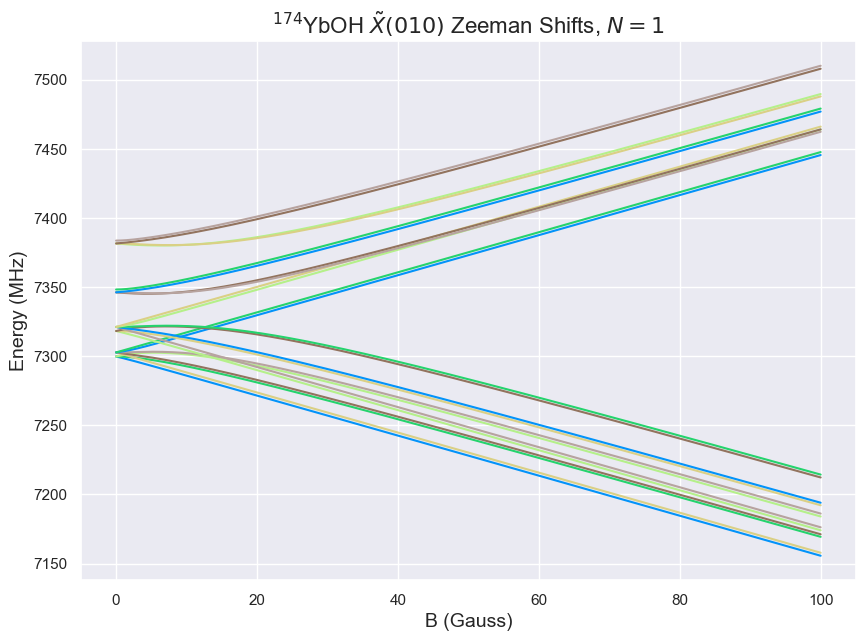

In [32]:
X000_174.ZeemanMap(Bz,0,plot=True)

The field shifts are stored as attributes. This allows us to compute the derivative of the Zeeman shifts, which tells us the magnetization of the levels.

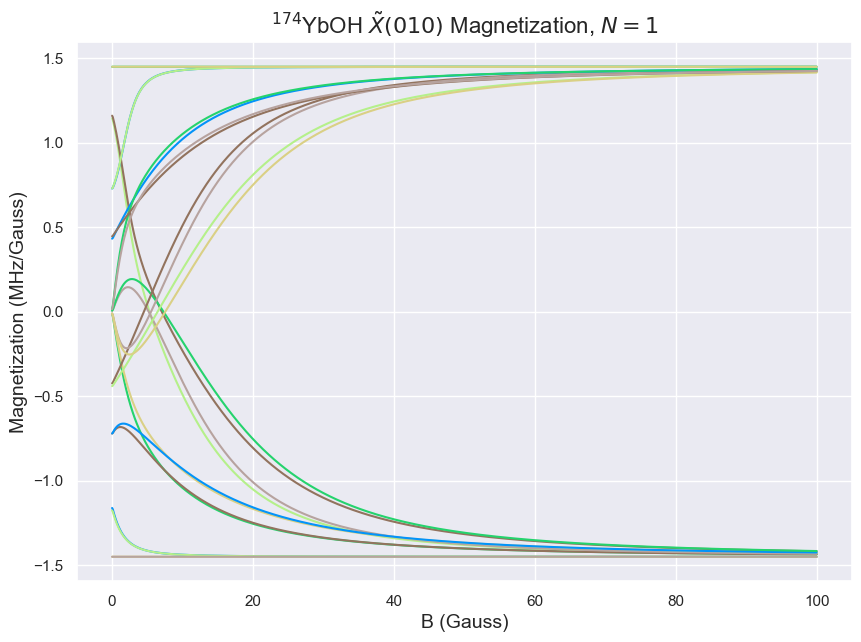

In [35]:
dB = Bz[1] - Bz[0]
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X000_174.evals_B.T):
    plt.plot(Bz,np.gradient(trace,dB))
plt.xlabel('B (Gauss)',fontsize=14)
plt.ylabel('Magnetization (MHz/Gauss)',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Magnetization, $N=1$',fontsize=16);

We can either plot directly with the StarkMap/ZeemanMap function, or we can use plot_evals_EB() to plot with additional options.

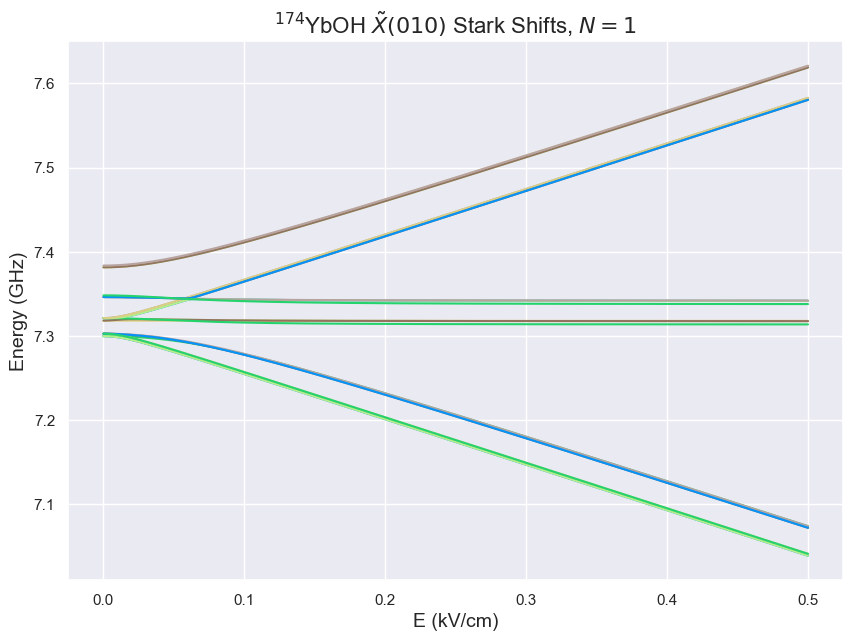

In [74]:
X010_174.StarkMap(Ez,1e-5,plot=False)
X010_174.plot_evals_EB('E',kV_kG=True,GHz=True)

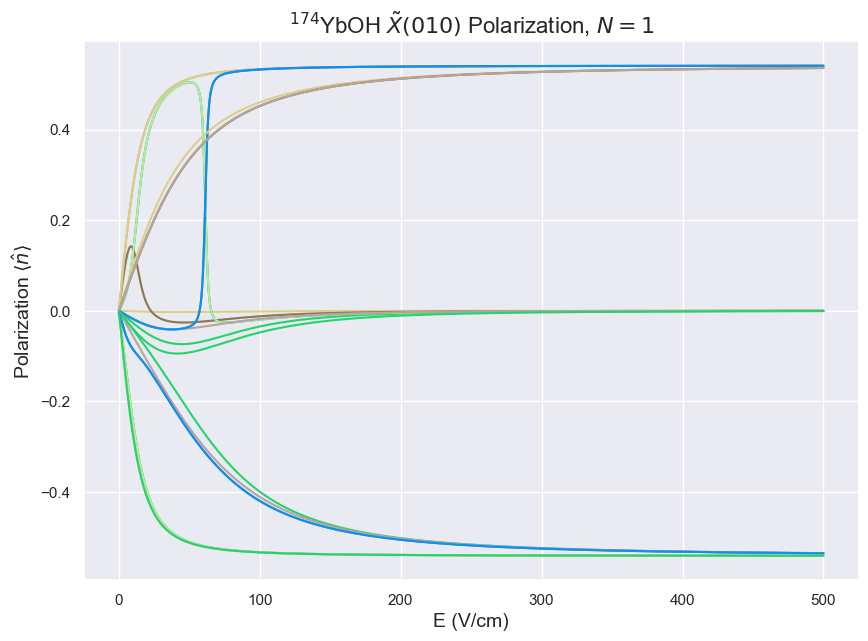

In [40]:
dE = Ez[1] - Ez[0]
plt.figure(figsize=(10,7))
for (i,trace) in enumerate(X010_174.evals_E.T):
    grad = np.gradient(trace,dE)
    plt.plot(Ez,grad)
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel(r'Polarization $\langle \hat{n} \rangle$',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$ Polarization, $N=1$',fontsize=16);

We can display a plot of the energy levels at arbitray field. (The code does not handle parity labeling well, so I am leaving out L for zero field.)\
The first and second argument are the E and B field values. The third argument is the pattern forming quantum number that sets how often the levels are labeled.

In [45]:
help(X010_174.display_levels)

Help on method display_levels in module Energy_Levels:

display_levels(Ez, Bz, pattern_q, idx=None, label=True, label_off=0.03, parity=False, pretty=True, thickness=1.5, label_q=None, width=0.75, ket_size=10, label_size=14, figsize=(10, 10), ylim=None, deltaE_label=3000, alt_label=False) method of Energy_Levels.MoleculeLevels instance



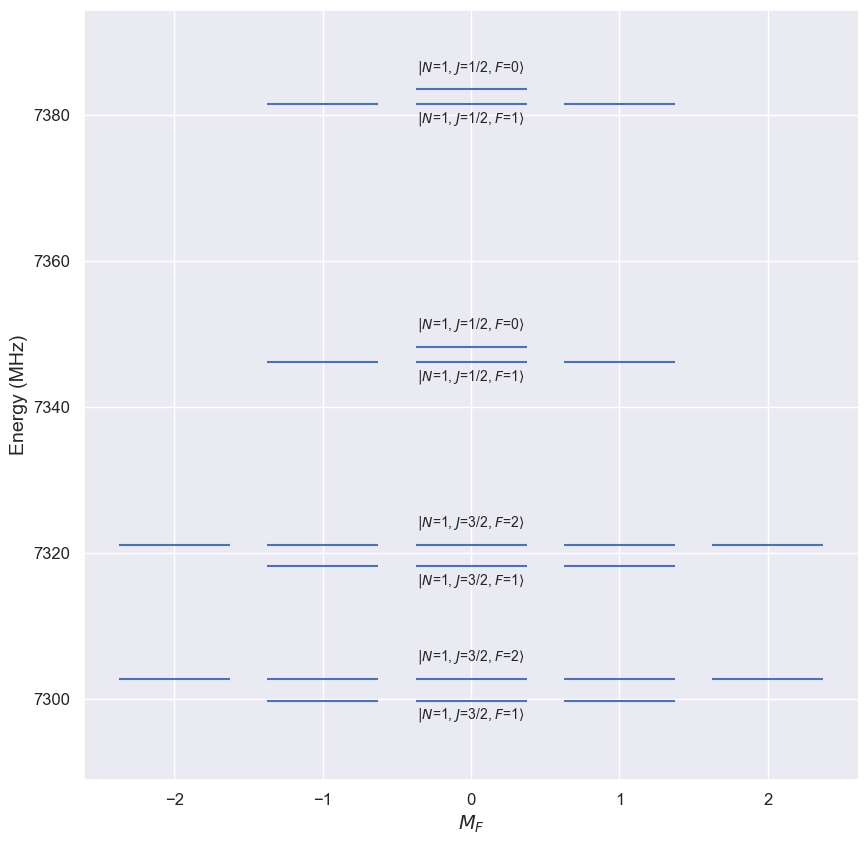

In [46]:
X010_174.display_levels(0,1e-8,'F',label_q=[q for q in X010_174.q_str if q!='K'],alt_label=True);

Additionally we can look at g-factors and dipole moments at a given E, B field

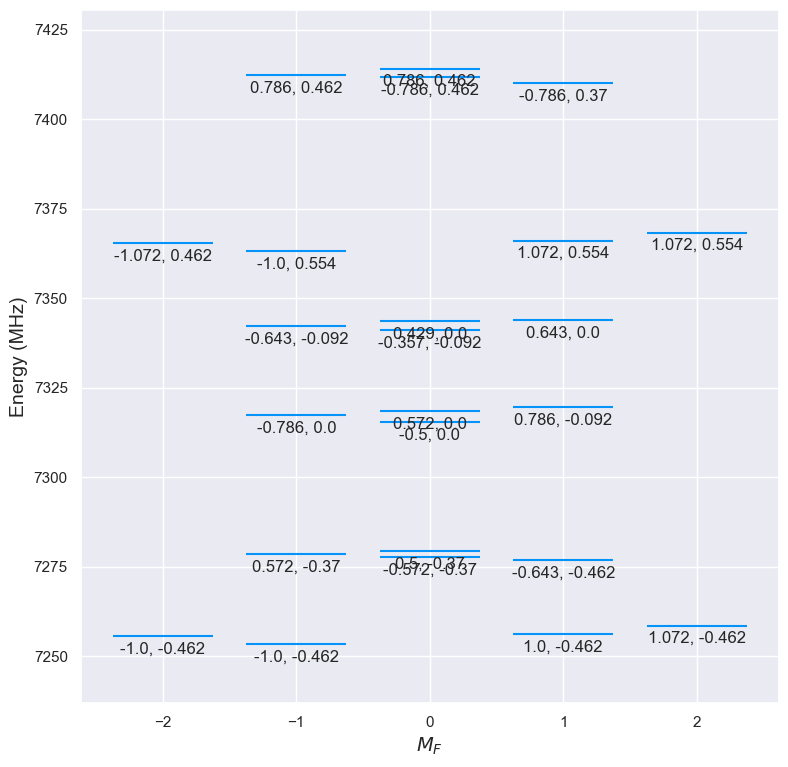

In [52]:
X010_174.display_g_D_eff(100,1,Estep=1e-5,Bstep=1e-5,round=3);

We can also look at PT violating shifts. Here, we consider the EDM shifts as a function of E field.

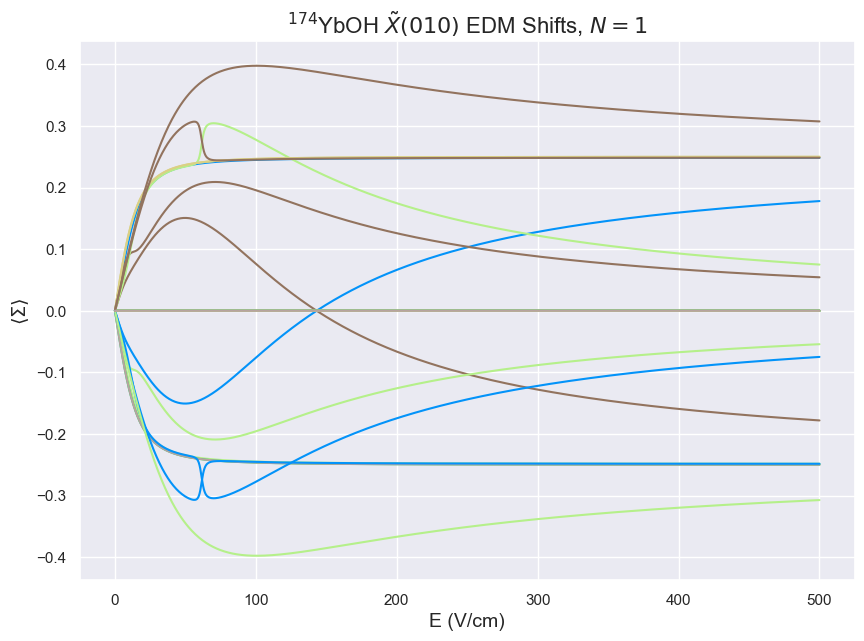

In [54]:
X010_174.PTV_Map('EDM',E_or_B='E',plot=True)

The values are stored in the attrbiute PTV_E or PTV_B, depending on what x-axis was used. To obtain the PTV shift for a single level as a function of field, look at the transpose of PTV_E.

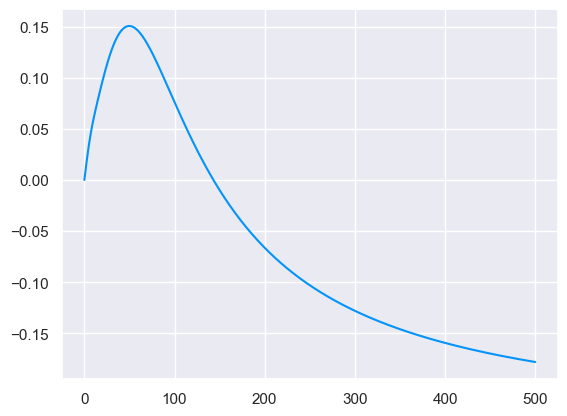

In [55]:
plt.plot(Ez,X010_174.PTV_E.T[4])

You can also display the PTV shifts for all levels in a given field configuration. Once again the first argument is E and the second is B

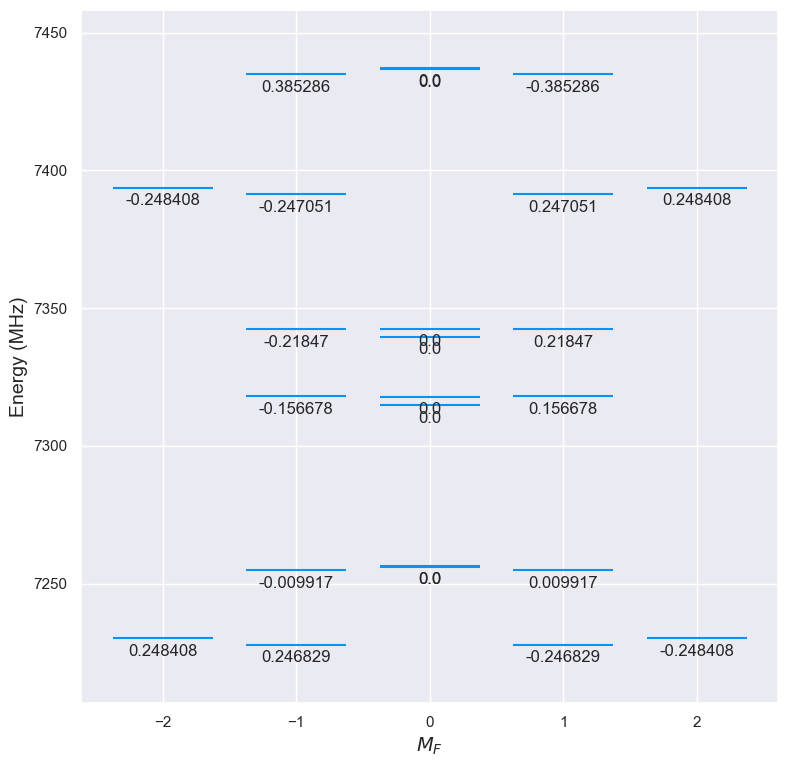

In [56]:
X010_174.display_PTV(150,1e-8,'EDM')

You can also look at g_factors as a function of E or B field. Note these functions require StarkMap and ZeemanMap to be run previously. If step is too small, the data will be noisy.

In [86]:
X010_174.g_eff_Map('E',step=1e-3);

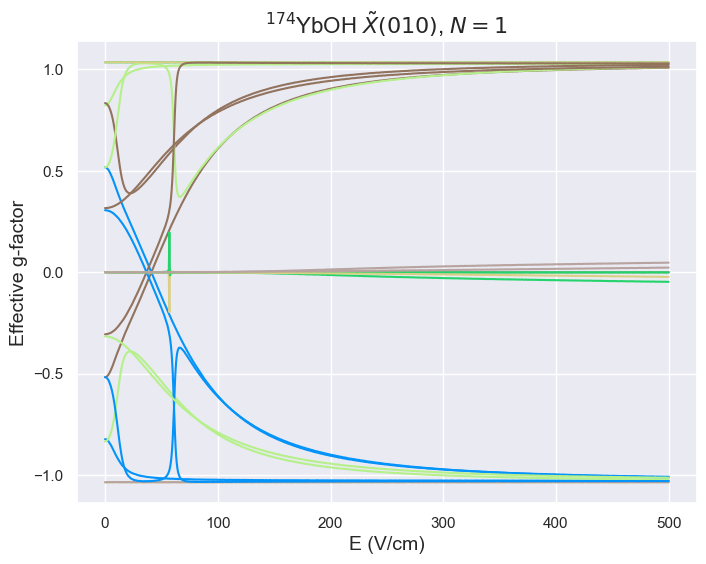

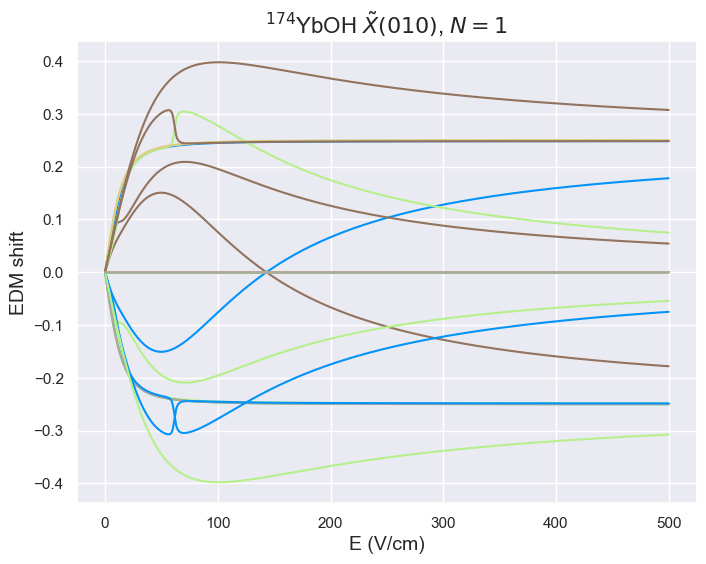

In [87]:
j = range(len(X010_174.evals0))
plt.figure(figsize=(8,6))
for i in j:#range(len(X010_174.g_eff_E.T)):
    plt.plot(Ez,X010_174.g_eff_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('Effective g-factor',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$, $N=1$',fontsize=16);
plt.figure(figsize=(8,6))
for i in j:#range(len(X010_174.PTV_E.T)):
    plt.plot(Ez,X010_174.PTV_E.T[i])
plt.xlabel('E (V/cm)',fontsize=14)
plt.ylabel('EDM shift',fontsize=14)
plt.title(r'$^{174}$YbOH $\tilde{X}(010)$, $N=1$',fontsize=16);